# Importing required Python libraries:

In [33]:
%matplotlib inline

from IPython.display import Image, HTML
import json
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud 
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from surprise import Reader, Dataset, SVD
from sklearn import datasets, linear_model
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)
import warnings; warnings.simplefilter('ignore')

[nltk_data] Downloading package stopwords to C:\Users\Apurva
[nltk_data]     Sarode\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Displaying the Dataset:

Once all the required libraries are imported, we then upload the dataset by reading Data from CSV file.

In [34]:
data = pd.read_csv('C:\\Users\\Apurva Sarode\\Desktop\\movie_stats\\movies_metadata.csv')
data.head().transpose()

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


## Understanding the Dataset

In [35]:
data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

### Features

* **adult:** The adult column indicates if the movie is X-Rated or Adult.
* **budget:** The budget of the movie in dollars.
* **genres:** A stringified list of dictionaries that list out all the genres associated with the movie.
* **id:** The ID of the move.
* **imdb_id:** The IMDB ID of the movie.
* **original_language:** The language in which the movie was originally shot in.
* **original_title:** The original title of the movie.
* **overview:** A brief blurb of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **production_companies:** A stringified list of production companies involved with the making of the movie.
* **production_countries:** A stringified list of countries where the movie was shot/produced in.
* **release_date:** Theatrical Release Date of the movie.
* **revenue:** The total revenue of the movie in dollars.
* **runtime:** The runtime of the movie in minutes.
* **spoken_languages:** A stringified list of spoken languages in the film.
* **status:** The status of the movie (Released, To Be Released, Announced, etc.)
* **title:** The Official Title of the movie.
* **vote_average:** The average rating of the movie.
* **vote_count:** The number of votes by users, as counted by TMDB.

Using shape method we can view number of rows and columns our data has.

In [36]:
data.shape

(45466, 24)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

There are 45,466 films in total, with 24 scenes. Most functions have very few NaN values (except for homepage and tagline). In the next part, we'll try to clean this dataset to a type suitable for review.





## Data Cleaning
## 1. What is data cleaning:
1) Data cleaning is the process of detecting and correcting or removing corrupt or inaccurate records from a record set which can be a table or database.

2) It refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty data. 

3) After cleansing, a data set should be consistent with other similar data sets in the system. 

4) The inconsistencies detected or removed may have been originally caused by user entry errors, by corruption in transmission or storage, or by different data dictionary definitions of similar entities.


## 2. Why is Data Cleaning Important?
Data cleaning step determines how easy your modelling is going to be. The better your data is, the less complex your learning algorithms need to be. Better structured data that provides the right input values will also determine the accuracy of your predictions. Data cleaning impacts efficiency of rest of your data modeling and decision-making process. This step is critical algorithm building step. 

Efficiency gains of data cleaning results from:

1) Lesser processing time

2) More accurate predictions

3) Simpler algorithms needed

4) Better learning ability of the model

In [38]:
data = data.drop(['imdb_id'], axis=1)

In [39]:
data[data['original_title'] != data['title']][['title', 'original_title']].head()

,title,original_title
28,The City of Lost Children,La Cité des Enfants Perdus
29,Shanghai Triad,摇啊摇，摇到外婆桥
32,Wings of Courage,"Guillaumet, les ailes du courage"
57,The Postman,Il postino
58,The Confessional,Le confessionnal


The original title refers to the film title in the native language in which the film was being made. As such, in this article, we would choose to use the translated, Anglicized name and will thus remove the original names entirely. By looking at the original language function, we would be able to deduce if the film is a foreign language film and no meaningful knowledge is lost in doing so.

In [40]:
data = data.drop('original_title', axis=1)

In [41]:
data[data['revenue'] == 0].shape

(38052, 22)

We see most films have a reported revenue of **0**. This means we don't have the overall sales information for these movies. Although this forms the majority of the movies that are available to us, we can also use revenue as an incredibly important feature from the remaining 7000 moves.

In [42]:
data['revenue'] = data['revenue'].replace(0, np.nan)

The budget function has some unclean values that make it allocated to Pandas as a generic entity. We're turning this into a numeric attribute and replacing all non-numeric values with NaN. Finally, as with budget, we'll convert all the 0 values to NaN to show the lack of budget details.

In [43]:
data['budget'] = pd.to_numeric(data['budget'], errors='coerce')
data['budget'] = data['budget'].replace(0, np.nan)
data[data['budget'].isnull()].shape

(36576, 22)

As we move forward trying to address some questions, we will need to create a variety of features appropriate for that specific query. We're going to create two very significant features for now: 

**year**: the year the film was released in. 

**Return**: The ratio of revenue to budget. 

The return feature is particularly informative, because it gives us a more detailed image of a film's financial success.Now, our data won't be able to determine if a \$200 million budget film that earned \$100 million did better than a \$50,000 budget film that took \$200,000 in. This framework can capture the information. 
A return value > 1 indicates benefit while a return value < 1 indicates a loss.

In [44]:
data['return'] = data['revenue'] / data['budget']
data[data['return'].isnull()].shape

(40085, 23)

We have nearly 5000 films for which we have the revenue and budget ratio info. That is almost 10 per cent of the entire dataset. Although this may seem tiny, this is adequate to conduct very valuable research and to uncover insightful insights about the world of films.

In [45]:
data['year'] = pd.to_datetime(data['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [46]:
data['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
Name: adult, dtype: int64

This dataset includes close to 0 adult movies. Therefore the adult element isn't really useful for us and can be safely removed.

In [47]:
data = data.drop('adult', axis=1)

## Exploratory Data Analysis

### Title and Overview Wordclouds

Are there certain words in Movie Titles and Movie Blurbs which appear more frequently? Assuming that there are certain terms that are considered more powerful and deserving of a title. Let's find out below.

In [48]:
data['title'] = data['title'].astype('str')
data['overview'] = data['overview'].astype('str')

In [49]:
title_corpus = ' '.join(data['title'])
overview_corpus = ' '.join(data['overview'])

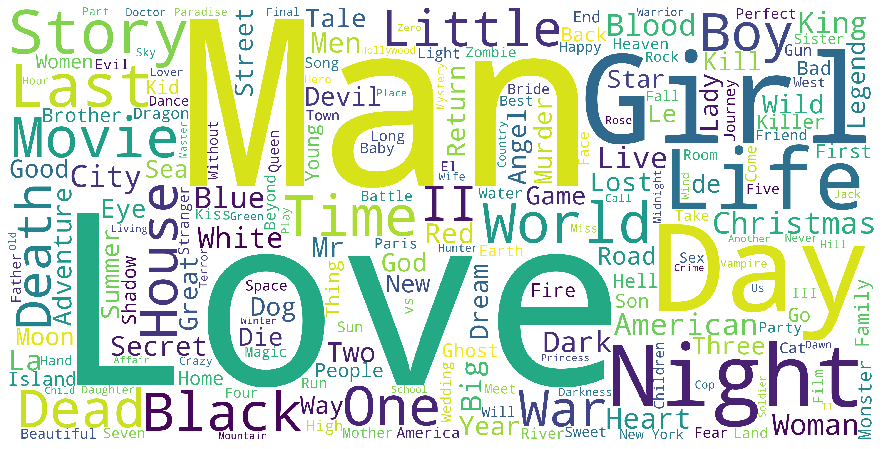

In [50]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

The word Love is the term most commonly used in film titles. Girl, day and man are among the most frequently used words, too. Which, We believe, encapsulates very well the notion of the pervasive existence of romance in films.

### Production Countries

The Dataset consists of movies that are overwhelmingly in the English language (more than 31000). However, these movies may have shot in various locations around the world. It would be interesting to see which countries serve as the most popular destinations for shooting movies by filmmakers, especially those in the United States of America and the United Kingdom.

In [51]:
data['production_countries'] = data['production_countries'].fillna('[]').apply(ast.literal_eval)
data['production_countries'] = data['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [52]:
s = data.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'

In [53]:
con_data = data.drop('production_countries', axis=1).join(s)
con_data = pd.DataFrame(con_data['countries'].value_counts())
con_data['country'] = con_data.index
con_data.columns = ['num_movies', 'country']
con_data = con_data.reset_index().drop('index', axis=1)
con_data.head(10)

,num_movies,country
0,21153,United States of America
1,4094,United Kingdom
2,3940,France
3,2254,Germany
4,2169,Italy
5,1765,Canada
6,1648,Japan
7,964,Spain
8,912,Russia
9,828,India


Unsurprisingly, the **US** is the most common movie production destination, because our dataset consists largely of English films. **Europe** is also very common with UK, France, Germany and Italy among the top 5. In terms of film production, **Japan** and **India** are the most famous Asian countries.

### Franchise Movies

Let's take a short look at Franchise films now. We were interested to discover amongst many other items the longest running and the most profitable franchises. Let's get our data wrangled and find out!

In [54]:
data_franchise = data[data['belongs_to_collection'].notnull()]
data_franchise['belongs_to_collection'] = data_franchise['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)
data_franchise = data_franchise[data_franchise['belongs_to_collection'].notnull()]

In [55]:
franchise_pivot = data_franchise.pivot_table(index='belongs_to_collection', values='revenue', aggfunc={'revenue': ['mean', 'sum', 'count']}).reset_index()

#### Highest Grossing Movie Franchises 

In [56]:
franchise_pivot.sort_values('sum', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
646,James Bond Collection,26,2.733450e+08,7.106970e+09
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09
1550,Transformers Collection,5,8.732202e+08,4.366101e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
1491,The Twilight Collection,5,6.684215e+08,3.342107e+09
610,Ice Age Collection,5,6.433417e+08,3.216709e+09
666,Jurassic Park Collection,4,7.578710e+08,3.031484e+09


The **Harry Potter** Series is the most profitable film franchise raking in more than $7.707bn$ from 8 films. The **Star war** Movies are coming in a near second too with $7.403 billion from 8 movies. **James Bond** is sixth, but the franchise has a slightly higher gross average than the others in the list.

#### Most Successful Movie Franchises (by Average Gross)

We'll use the average gross per film to gauge a film franchise's success. This is not a very effective measure, however, as the sales in this dataset have not been adjusted for inflation. Revenue figures would also seem, in recent times, to support franchises strongly.

In [57]:
franchise_pivot.sort_values('mean', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
112,Avatar Collection,1,2.787965e+09,2.787965e+09
1245,The Avengers Collection,2,1.462481e+09,2.924962e+09
479,Frozen Collection,1,1.274219e+09,1.274219e+09
446,Finding Nemo Collection,2,9.844532e+08,1.968906e+09
1352,The Hobbit Collection,3,9.785078e+08,2.935523e+09
1388,The Lord of the Rings Collection,3,9.721816e+08,2.916545e+09
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09


While the **Avatar** Series currently consists of only one film, it is the most profitable franchise of all time, with the sole film raking in nearly $3$ billion. For at least 5 movies the **Harry Potter** series is the most successful franchise.

### Production Companies

In [58]:
data['production_companies'] = data['production_companies'].fillna('[]').apply(ast.literal_eval)
data['production_companies'] = data['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [59]:
s = data.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'

In [60]:
companies_data = data.drop('production_companies', axis=1).join(s)

In [61]:
companies_sum = pd.DataFrame(companies_data.groupby('companies')['revenue'].sum().sort_values(ascending=False))
companies_sum.columns = ['Total']
companies_mean = pd.DataFrame(companies_data.groupby('companies')['revenue'].mean().sort_values(ascending=False))
companies_mean.columns = ['Average']
companies_count = pd.DataFrame(companies_data.groupby('companies')['revenue'].count().sort_values(ascending=False))
companies_count.columns = ['Number']

companies_pivot = pd.concat((companies_sum, companies_mean, companies_count), axis=1)

#### Highest Earning Production Companies

Let's find out which production companies have gained the most out of the business of producing movies.

In [62]:
companies_pivot.sort_values('Total', ascending=False).head(10)

,Total,Average,Number
Warner Bros.,6.352519e+10,1.293792e+08,491
Universal Pictures,5.525919e+10,1.193503e+08,463
Paramount Pictures,4.880819e+10,1.235650e+08,395
Twentieth Century Fox Film Corporation,4.768775e+10,1.398468e+08,341
Walt Disney Pictures,4.083727e+10,2.778046e+08,147
Columbia Pictures,3.227974e+10,1.367785e+08,236
New Line Cinema,2.217339e+10,1.119868e+08,198
Amblin Entertainment,1.734372e+10,2.550547e+08,68
DreamWorks SKG,1.547575e+10,1.984071e+08,78
Dune Entertainment,1.500379e+10,2.419966e+08,62


**Warner Bros** is the most successful production company ever to receive a record $63.5$ billion dollar from nearly 500 films. **Universal Pictures** and **Paramaount Pictures** are the second and third highest earning companies with sales of $55 billion and 48 billion dollar , respectively.

#### Most Succesful Production Companies

In [64]:
companies_pivot[companies_pivot['Number'] >= 15].sort_values('Average', ascending=False).head(10)

,Total,Average,Number
Pixar Animation Studios,1.118853e+10,6.215852e+08,18
Marvel Studios,1.169964e+10,6.157703e+08,19
Revolution Sun Studios,8.120339e+09,5.413559e+08,15
Lucasfilm,9.898421e+09,4.499282e+08,22
DreamWorks Animation,1.370752e+10,4.031622e+08,34
DC Entertainment,6.212609e+09,3.882880e+08,16
Dentsu,6.853205e+09,3.807336e+08,18
Jerry Bruckheimer Films,8.957441e+09,3.732267e+08,24
Marvel Enterprises,6.538067e+09,3.441088e+08,19
Legendary Pictures,1.346866e+10,3.367166e+08,40


**Pixar Animation Studios** has produced the most successful movies, on average. This is not surprising considering the amazing array of movies that it has produced in the last few decades: Up, Finding Nemo, Inside Out, Wall-E, Ratatouille, the Toy Story Franchise, Cars Franchise, etc. **Marvel Studios** with an average gross of 615 million dollars comes in second with movies such as Iron Man and The Avengers under its banner.

### Original Language

Let's look into the languages of the films in our dataset in this segment. We have already deduced from the countries of production that the majority of the films in the dataset are English. Let's see what reflect the other big languages.

In [65]:
data['original_language'].drop_duplicates().shape[0]

93

In [66]:
language_data = pd.DataFrame(data['original_language'].value_counts())
language_data['language'] = language_data.index
language_data.columns = ['number', 'language']
language_data.head()

,number,language
en,32269,en
fr,2438,fr
it,1529,it
ja,1350,ja
de,1080,de


Our dataset contains over 93 languages. English language films form the vast majority, as we had expected. Both French and Italian films come in very distant seconds and thirds. Let us represent the most common languages in the form of a bar plot (apart from English). 

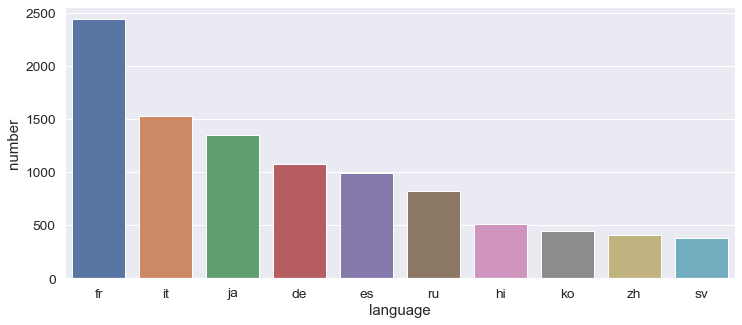

In [67]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=language_data.iloc[1:11])
plt.show()

As described earlier, after **English**, **French** and **Italian** are the languages that occur the most. As for Asian Languages, **Japanese** and **Hindi** make up the rest.

### Movie Release Dates

Release dates may also play a very significant role in assessing a specific film's success and revenue generation. We will seek to gain insights into release dates in terms of the years, months, and days of the week in this segment.

The **year** feature was already installed in our preliminary data wrangling phase. Let's extract the month and day with a release date for will movie now too.

In [68]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [69]:
def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

In [70]:
def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))    
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

In [71]:
data['day'] = data['release_date'].apply(get_day)
data['month'] = data['release_date'].apply(get_month)



With these features in hand, let us now check the most popular and most successful months and days.

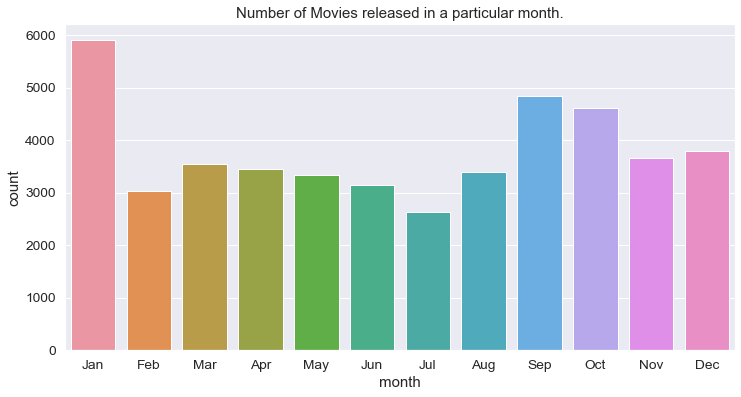

In [72]:
plt.figure(figsize=(12,6))
plt.title("Number of Movies released in a particular month.")
sns.countplot(x='month', data=data, order=month_order)

**January** continues to be the most common month when it comes to film releases. It is also known in Hollywood circles as the **the dump month** when the dozen release sub par films.

What bockbuster movies tend to release in what months? To answer this question, we will consider all films that have made more than $100 million, and measure the gross average for each month.

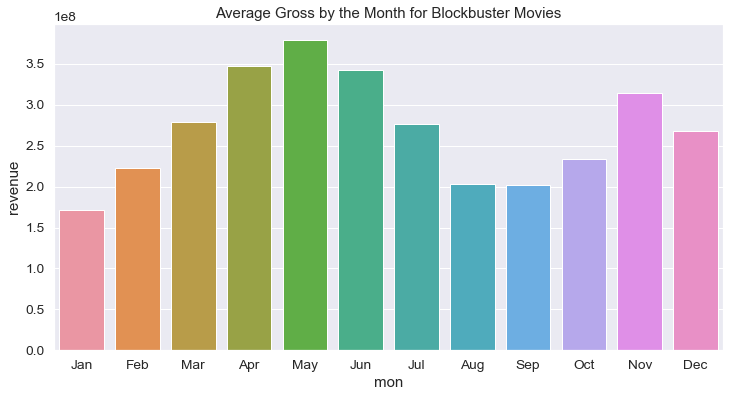

In [73]:
month_mean = pd.DataFrame(data[data['revenue'] > 1e8].groupby('month')['revenue'].mean())
month_mean['mon'] = month_mean.index
plt.figure(figsize=(12,6))
plt.title("Average Gross by the Month for Blockbuster Movies")
sns.barplot(x='mon', y='revenue', data=month_mean, order=month_order)

We note that the months of **April**,**May** and **June** have the highest gross average of the top grossing films. This can be due to the fact that hit movies are usually released in the summer when the children are out of school and the parents are on holiday and, thus, the audience is more likely to spend their discretionary income on entertainment.

Let us now have a look at the most popular days as we did for months.

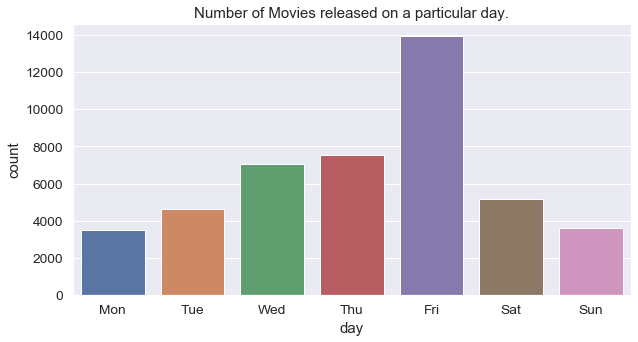

In [74]:
plt.figure(figsize=(10,5))
plt.title("Number of Movies released on a particular day.")
sns.countplot(x='day', data=data, order=day_order)

**Friday** is probably the most famous day for film releases. That's understandable given the fact that it typically denotes the weekend start. **Sunday** and **Monday** are the least-popular days and can be due to the same cause.

#### Number of Movies by the year
The Dataset of 45,000 movies that are available to us does not reflect the entire corpus of films that have been released since cinema started. However, given that it contains nearly every major film released in Hollywood as well as other major film industries worldwide (such as Bollywood in India) is reassumable.
Keeping this assumption in mind, let's look at the number of films produced by the year.

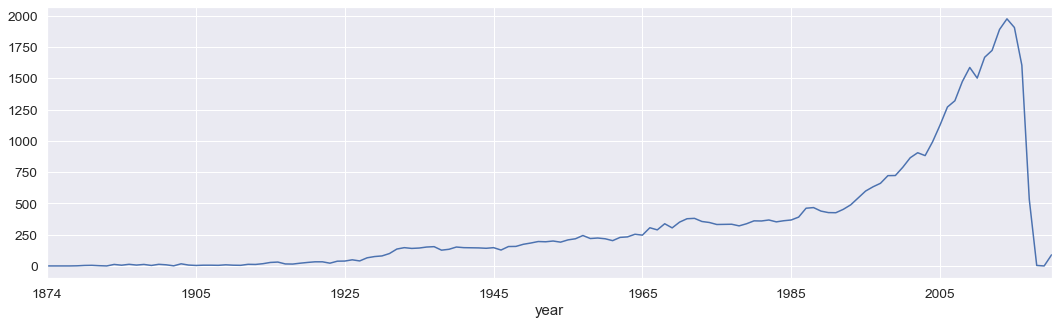

In [75]:
year_count = data.groupby('year')['title'].count()
plt.figure(figsize=(18,5))
year_count.plot()

We note a sharp increase in the number of movies beginning the decade of the 1990's. We should not look too much into this, however, because it is entirely possible that recent films have been oversampled for this dataset's purposes. 

Next, let's look at the earliest films represented in the dataset.

### Budget

Now let's turn our attention to the budget. We expect budgets to be a skewed sum and inflation-influenced too. Nevertheless, gaining as much information as possible from this quantity would be useful because budget is always a crucial feature in predicting film revenue and performance. Let us begin by gathering the summary statistics for our budget.

In [76]:
data['budget'].describe()

count    8.890000e+03
mean     2.160428e+07
std      3.431063e+07
min      1.000000e+00
25%      2.000000e+06
50%      8.000000e+06
75%      2.500000e+07
max      3.800000e+08
Name: budget, dtype: float64

A film's total budget is 21.6 million dollar, while the median budget is much lower at 8 million dollar. This clearly indicates outliers are affected by the mean.

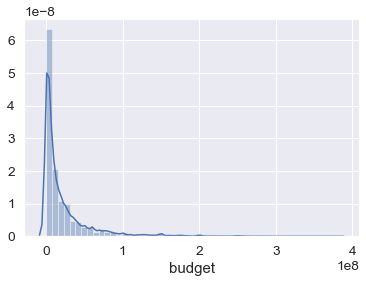

In [77]:
sns.distplot(data[data['budget'].notnull()]['budget'])

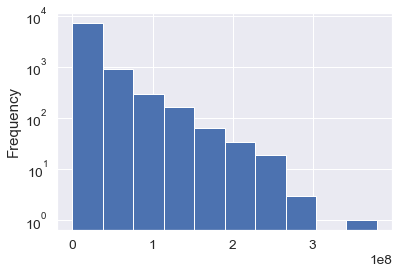

In [78]:
data['budget'].plot(logy=True, kind='hist')

Movie budget distribution shows an exponential decay. More than 75 percent of the films have a budget less than 25 million dollar. Next, let's take a look at the most expensive all-time movies and the revenue & returns they generated.


#### Most Expensive Movies of all Time

In [79]:
data[data['budget'].notnull()][['title', 'budget', 'revenue', 'return', 'year']].sort_values('budget', ascending=False).head(10)

,title,budget,revenue,return,year
17124,Pirates of the Caribbean: On Stranger Tides,380000000.0,1.045714e+09,2.751878,2011
11827,Pirates of the Caribbean: At World's End,300000000.0,9.610000e+08,3.203333,2007
26558,Avengers: Age of Ultron,280000000.0,1.405404e+09,5.019299,2015
11067,Superman Returns,270000000.0,3.910812e+08,1.448449,2006
44842,Transformers: The Last Knight,260000000.0,6.049421e+08,2.326701,2017
16130,Tangled,260000000.0,5.917949e+08,2.276134,2010
18685,John Carter,260000000.0,2.841391e+08,1.092843,2012
11780,Spider-Man 3,258000000.0,8.908716e+08,3.452991,2007
21175,The Lone Ranger,255000000.0,8.928991e+07,0.350157,2013
22059,The Hobbit: The Desolation of Smaug,250000000.0,9.584000e+08,3.833600,2013


Two **Carribean Pirates** films hold the top slots in this list with a massive 300 million dollar budget. All the top 10 most expensive movies made a return on their investment except for **The Lone Ranger** who managed to raise less than 35 percent of their investment, pulling in a pitiful 90 million dollar on a 255 million dollar budget.

How good is the budget's connection with the revenues? A stronger correlation would mean more reliable forecasts.

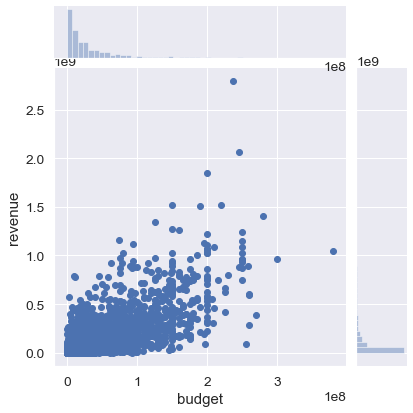

In [80]:
sns.jointplot(x='budget',y='revenue',data=data[data['return'].notnull()])

The pearson r value of **0.73** between the two quantities indicates a very strong correlation. 

### Revenue

The final numerical function we will be exploring is profits. Perhaps the most critical numerical number associated with a film is the revenue. In a later segment, we'll try to predict the revenue for films given a collection of features. Revenue treatment will be very similar to budget treatment and we will continue by reviewing the summary statistics once again.

In [81]:
data['revenue'].describe()

count    7.408000e+03
mean     6.878739e+07
std      1.464203e+08
min      1.000000e+00
25%      2.400000e+06
50%      1.682272e+07
75%      6.722707e+07
max      2.787965e+09
Name: revenue, dtype: float64

A film's mean gross is **68.7 million dollar** while the median gross is much smaller at **16.8 million dollar**, showing the distorted value of sales. A film's lowest income is just dollar 1 while the highest grossing film of all time has raked in an astounding **2.78 billion dollars**.

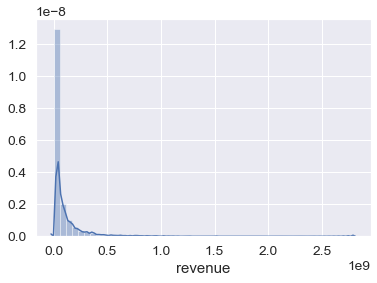

In [82]:
sns.distplot(data[data['revenue'].notnull()]['revenue'])

Revenue distribution is undergoing exponential decline as is expenditure. We've also observed strong similarities between the two quantities. Let's look now at the highest and least grossing films of all time.

#### Highest Grossing Films of All Time

In [84]:
grossmovie_top = data[['poster_path', 'title', 'budget', 'revenue', 'year']].sort_values('revenue', ascending=False).head(10)
pd.set_option('display.max_colwidth', 100)
HTML(grossmovie_top.to_html(escape=False))

,poster_path,title,budget,revenue,year
14551,/kmcqlZGaSh20zpTbuoF0Cdn07dT.jpg,Avatar,237000000.0,2.787965e+09,2009
26555,/weUSwMdQIa3NaXVzwUoIIcAi85d.jpg,Star Wars: The Force Awakens,245000000.0,2.068224e+09,2015
1639,/kHXEpyfl6zqn8a6YuozZUujufXf.jpg,Titanic,200000000.0,1.845034e+09,1997
17818,/cezWGskPY5x7GaglTTRN4Fugfb8.jpg,The Avengers,220000000.0,1.519558e+09,2012
25084,/jjBgi2r5cRt36xF6iNUEhzscEcb.jpg,Jurassic World,150000000.0,1.513529e+09,2015
28830,/dCgm7efXDmiABSdWDHBDBx2jwmn.jpg,Furious 7,190000000.0,1.506249e+09,2015
26558,/t90Y3G8UGQp0f0DrP60wRu9gfrH.jpg,Avengers: Age of Ultron,280000000.0,1.405404e+09,2015
17437,/fTplI1NCSuEDP4ITLcTps739fcC.jpg,Harry Potter and the Deathly Hallows: Part 2,125000000.0,1.342000e+09,2011
22110,/jIjdFXKUNtdf1bwqMrhearpyjMj.jpg,Frozen,150000000.0,1.274219e+09,2013
42222,/tWqifoYuwLETmmasnGHO7xBjEtt.jpg,Beauty and the Beast,160000000.0,1.262886e+09,2017


In [85]:
pd.set_option('display.max_colwidth', 50)

The figures for inflation have not been changed. And we're seeing a huge amount of films in the top 10 list from very recent times. Let's map the highest revenue over the years to get an idea of the revenue earned from movies.

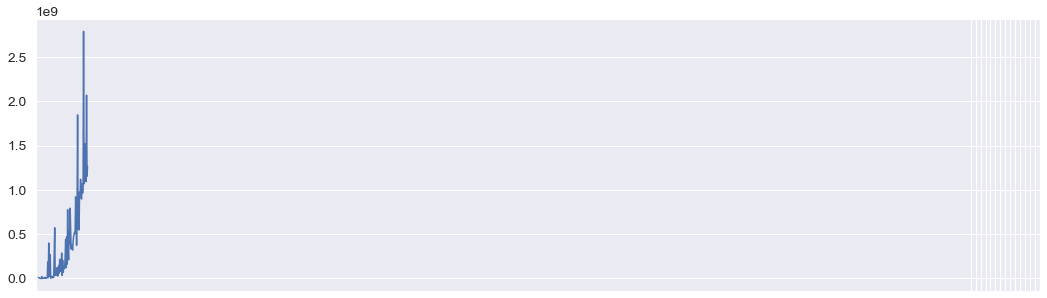

In [86]:
plt.figure(figsize=(18,5))
year_revenue = data[(data['revenue'].notnull()) & (data['year'] != 'NaT')].groupby('year')['revenue'].max()
plt.plot(year_revenue.index, year_revenue)
plt.xticks(np.arange(1874, 2024, 10.0))
plt.show()

The cumulative gross, as can be seen from the calculation, has gradually risen over the years. In 1997, the world of films hit the 1 billion dollar mark with **Titanic's** debut. It took another 12 years for **Avatar** to reach the dollar 2 trillion mark. James Cameron directed both of those films.

### Returns

For the time being, we will not be looking too much into returns. Let's just check out the least and most popular all-time movies. To do so, we're just going to find those movies that have a budget greater than dollar 5 million.

#### Most Successful Movies

In [87]:
data[(data['return'].notnull()) & (data['budget'] > 5e6)][['title', 'budget', 'revenue', 'return', 'year']].sort_values('return', ascending=False).head(10)

,title,budget,revenue,return,year
1065,E.T. the Extra-Terrestrial,10500000.0,792965326.0,75.520507,1982
256,Star Wars,11000000.0,775398007.0,70.490728,1977
1338,Jaws,7000000.0,470654000.0,67.236286,1975
1888,The Exorcist,8000000.0,441306145.0,55.163268,1973
352,Four Weddings and a Funeral,6000000.0,254700832.0,42.450139,1994
834,The Godfather,6000000.0,245066411.0,40.844402,1972
4492,Look Who's Talking,7500000.0,296000000.0,39.466667,1989
24258,Annabelle,6500000.0,255273813.0,39.272894,2014
1056,Dirty Dancing,6000000.0,213954274.0,35.659046,1987
1006,The Sound of Music,8200000.0,286214286.0,34.904181,1965


#### Worst Box Office Disasters

In [88]:
data[(data['return'].notnull()) & (data['budget'] > 5e6) & (data['revenue'] > 10000)][['title', 'budget', 'revenue', 'return', 'year']].sort_values('return').head(10)

,title,budget,revenue,return,year
11159,Chaos,20000000.0,10289.0,0.000514,2005
19027,5 Days of War,20000000.0,17479.0,0.000874,2011
21034,Special Forces,10000000.0,10759.0,0.001076,2011
25732,Foodfight!,65000000.0,73706.0,0.001134,2012
38388,Term Life,16500000.0,21256.0,0.001288,2016
19505,Laurence Anyways,9500000.0,12250.0,0.001289,2012
12038,The Good Night,15000000.0,20380.0,0.001359,2007
3966,Cherry 2000,10000000.0,14000.0,0.001400,1987
22097,Twice Born,13000000.0,18295.0,0.001407,2012
5651,All The Queen's Men,15000000.0,23000.0,0.001533,2001


With these analyses in place, we are in a good position to construct our correlation matrix.

In [89]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [90]:
data['year'] = data['year'].replace('NaT', np.nan)

In [91]:
data['year'] = data['year'].apply(clean_numeric)

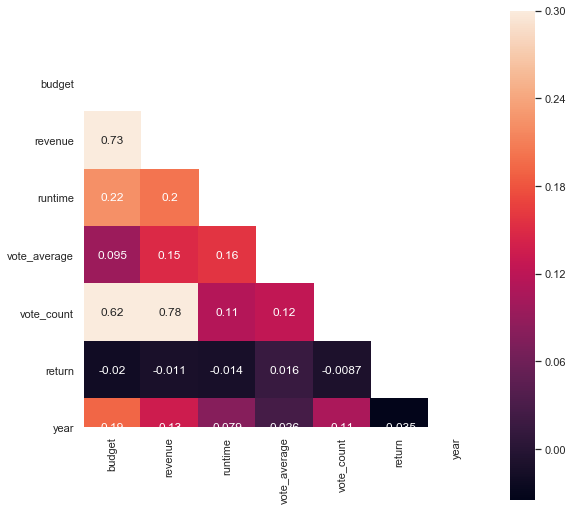

In [92]:
sns.set(font_scale=1)
correlation = data.corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(9,9))
    ax = sns.heatmap(correlation, mask=mask, vmax=.3, square=True, annot=True)

In [93]:
sns.set(font_scale=1.25)

### Genres

In [94]:
data['genres'] = data['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [95]:
s = data.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'

In [96]:
genre_data = data.drop('genres', axis=1).join(s)

In [97]:
genre_data['genre'].value_counts().shape[0]

32

For our collection of 45,000 movies TMDB identifies 32 different genres. Let's look at the most growing genres in cinemas now.

In [98]:
popular_gen = pd.DataFrame(genre_data['genre'].value_counts()).reset_index()
popular_gen.columns = ['genre', 'movies']
popular_gen.head(10)

,genre,movies
0,Drama,20265
1,Comedy,13182
2,Thriller,7624
3,Romance,6735
4,Action,6596
5,Horror,4673
6,Crime,4307
7,Documentary,3932
8,Adventure,3496
9,Science Fiction,3049


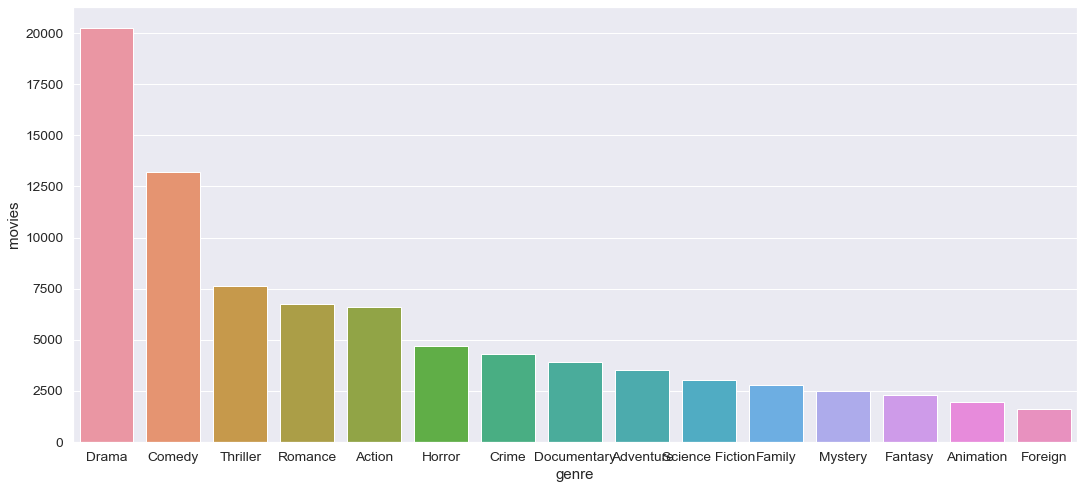

In [99]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre', y='movies', data=popular_gen.head(15))
plt.show()

Drama is the most prevalent genre, with almost half of the films describing themselves as a drama. Comedy comes in at a distant second with 25 per cent of the films having sufficient comedy doses. Action, Horror, Crime, Mystery, Science Fiction, Animation, and Fantasy are other major genres included in the top 10.

The next question I would like to discuss is the developments in the share of film genres around the world. Has there increased interest for Science Fiction movies? Will Animation Films have a disproportionate share in certain years? Let's work it out!

We will only look at patterns starting in the year 2000. We'll only find certain themes that occur in the most common genres in the top 15. Documentaries, families, and foreign films will be exempt from our study.

In [100]:
genres = ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime', 'Adventure', 'Science Fiction', 'Mystery', 'Fantasy', 'Mystery', 'Animation']

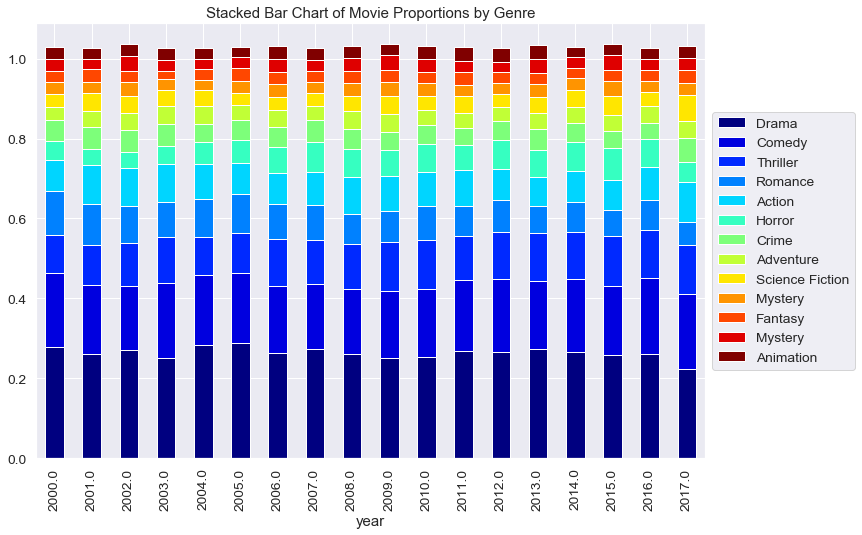

In [101]:
popular_genre_movies = genre_data[(genre_data['genre'].isin(genres)) & (genre_data['year'] >= 2000) & (genre_data['year'] <= 2017)]
ctab = pd.crosstab([popular_genre_movies['year']], popular_genre_movies['genre']).apply(lambda x: x/x.sum(), axis=1)
ctab[genres].plot(kind='bar', stacked=True, colormap='jet', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Stacked Bar Chart of Movie Proportions by Genre")
plt.show()

Since the beginning of this century, the proportion of films of each genre has remained relatively constant, except for Drama. The number of drama films has fallen by over 5%. A share of horror movies enjoyed a modest rise.

One question we always had is why some genres are particularly more popular than others. Of instance, we would expect Science Fiction and Fantasy Movies to bring in more revenue than other genres but do they prove as effective when normalized with their budget? For answer this question, we must imagine two plots of violins. One will be genres versus the revenue while the other will be versus returns.

In [102]:
violin_genres = ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime', 'Science Fiction', 'Fantasy', 'Animation']
violin_movies = genre_data[(genre_data['genre'].isin(violin_genres))]

<Figure size 1296x576 with 0 Axes>

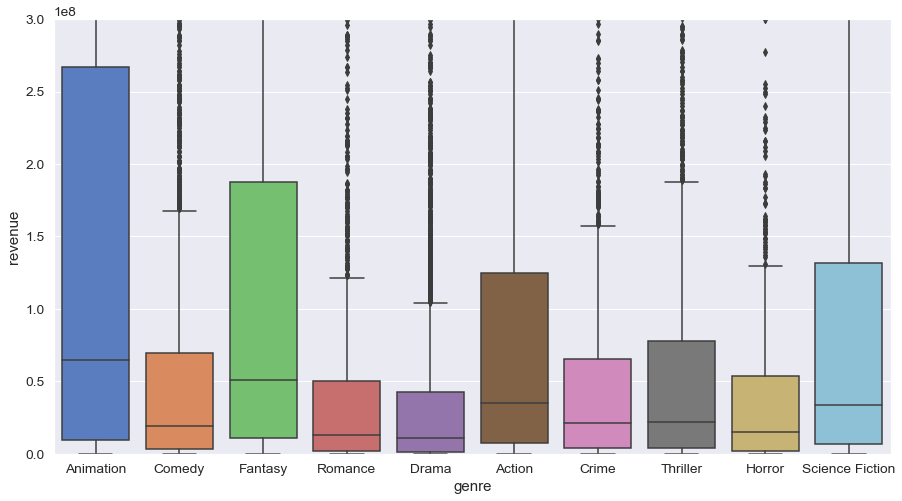

In [103]:
plt.figure(figsize=(18,8))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='genre', y='revenue', data=violin_movies, palette="muted", ax =ax)
ax.set_ylim([0, 3e8])
plt.show()

Animation films have the highest range of 25-75 as well as the median income of all the genres depicted. Fantasy and Science Fiction both have the second and third highest median income.

<Figure size 1296x576 with 0 Axes>

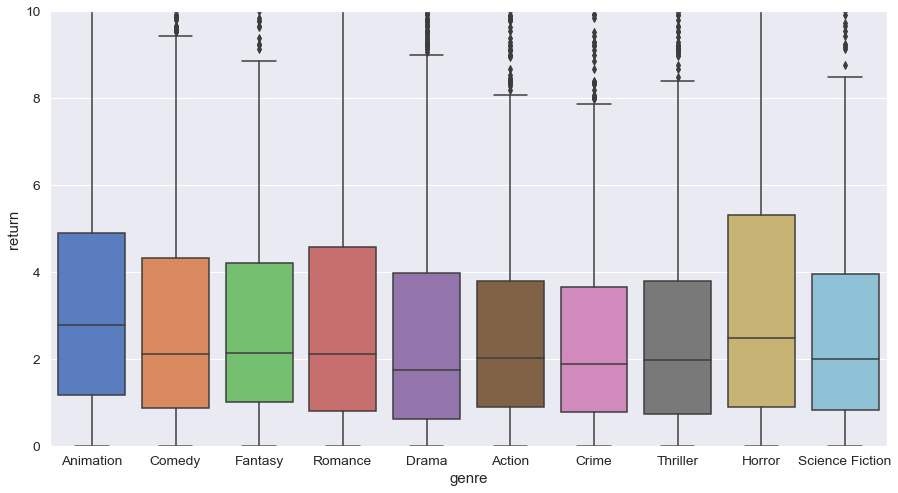

In [104]:
plt.figure(figsize=(18,8))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='genre', y='return', data=violin_movies, palette="muted", ax =ax)
ax.set_ylim([0, 10])
plt.show()

It would appear from the boxplot that Animation Movies continues to produce the highest average returns. Horror Films appears to be a safe bet too. It is partially due to the low budget nature of Horror movies compared to Fantasy Movies while being able to produce very high sales according to their budget.

### Cast and Crew

Let's take a look at our films cast and crew now. We don't have those information in our main dataset with us. We also have a separate file, however, consisting of all the Movies full cast and crew credits. Let us take a look at the data on these credits.

In [105]:
credits_data = pd.read_csv('C:\\Users\\Apurva Sarode\\Desktop\\movie_stats\\credits.csv')
credits_data.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


#### Credits Dataset

* **cast:** A stringified list of dictionaries consisting of cast names and the corresponding characters they played.
* **crew:** A stringified list of dictionaries consisting of crew names and the function they performed.
* **id:** The TMDB ID of movie.

We need to connect our original metadata dataframe with the credits dataframe on the TMDB Movie ID to the left. Before we can perform this join, we need to make sure that our main dataframe's ID column is clean and of type integer.

To do this, let's try to convert our IDs to an integer and, if an exception is created, we must overwrite the ID with NaN. So we will continue to remove those rows from our data frame.

In [106]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [107]:
data['id'] = data['id'].apply(convert_int)

In [108]:
data[data['id'].isnull()]

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,...,status,tagline,title,video,vote_average,vote_count,return,year,day,month
19730,0.065736,NaN,"[Carousel Productions, Vision View Entertainme...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",NaN,104.0,Released,NaN,Midnight Man,[],...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,1.931659,NaN,"[Aniplex, GoHands, BROSTA TV, Mardock Scramble...","[{'iso_3166_1': 'US', 'name': 'United States o...",NaN,68.0,Released,NaN,Mardock Scramble: The Third Exhaust,[],...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,2.185485,NaN,"[Odyssey Media, Pulser Productions, Rogue Stat...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",NaN,82.0,Released,Beware Of Frost Bites,Avalanche Sharks,[],...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
data = data.drop([19730, 29503, 35587])

In [110]:
data['id'] = data['id'].astype('int')

In [111]:
data = data.merge(credits_data, on='id')
data.shape

(45538, 27)

In [112]:
data['cast'] = data['cast'].apply(ast.literal_eval)
data['crew'] = data['crew'].apply(ast.literal_eval)

In [113]:
data['cast_size'] = data['cast'].apply(lambda x: len(x))
data['crew_size'] = data['crew'].apply(lambda x: len(x))

In [114]:
data['cast'] = data['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [115]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [116]:
data['director'] = data['crew'].apply(get_director)

In [117]:
s = data.apply(lambda x: pd.Series(x['cast']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'actor'
cast_data = data.drop('cast', axis=1).join(s)

Let's look now at the actors and directors who have raked their movies in the most revenue.

#### Actors with the Highest Total Revenue

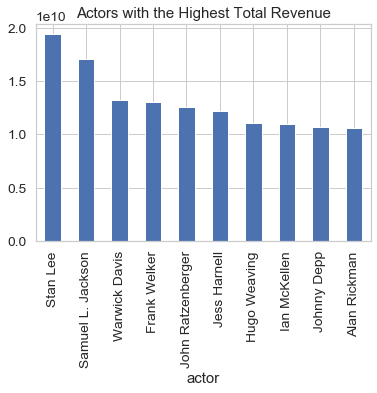

In [118]:
sns.set_style('whitegrid')
plt.title('Actors with the Highest Total Revenue')
cast_data.groupby('actor')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

#### Directors with the Highest Total Revenue

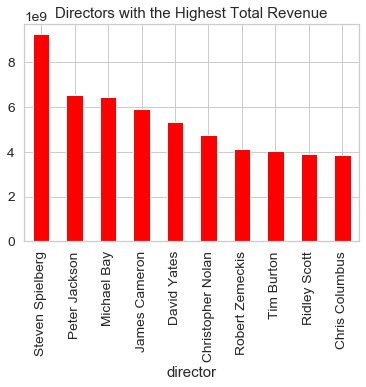

In [119]:
plt.title('Directors with the Highest Total Revenue')
data.groupby('director')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar', colormap='autumn')
plt.show()

We will find only actors and directors who have acted and directed in at least 5 films, respectively, for average revenues.

In [120]:
actor_list = cast_data.groupby('actor')['revenue'].count().sort_values(ascending=False)
actor_list = list(actor_list[actor_list >= 5].index)
director_list = data.groupby('director')['revenue'].count().sort_values(ascending=False)
director_list = list(director_list[director_list >= 5].index)

#### Actors with Highest Average Revenue

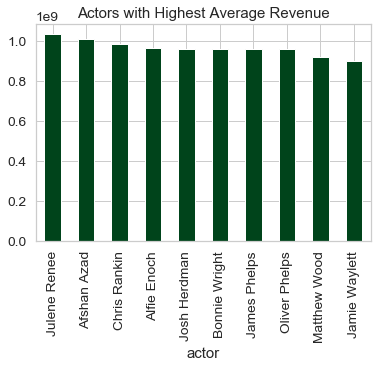

In [121]:
plt.title("Actors with Highest Average Revenue")
cast_data[cast_data['actor'].isin(actor_list)].groupby('actor')['revenue'].mean().sort_values(ascending=False).head(10).plot(kind='bar', colormap='Greens_r')
plt.show()

#### Directors with Highest Average Revenue

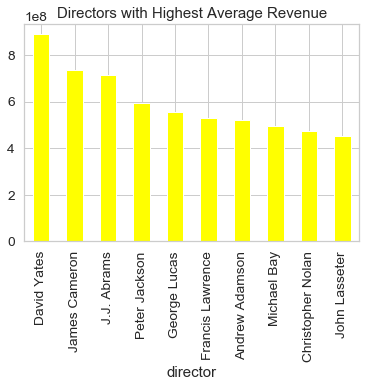

In [122]:
plt.title("Directors with Highest Average Revenue")
data[data['director'].isin(director_list)].groupby('director')['revenue'].mean().sort_values(ascending=False).head(10).plot(kind='bar', colormap='autumn_r')
plt.show()

What actors and directors constitute the safest bet? For this we will find the average return that a single director or actor has taken in. We'll find only those films that have raked in at least $10 million. We'll also find only actors and directors who have worked in at least 5 movies.

#### Most Successful Actors

In [123]:
success_data = cast_data[(cast_data['return'].notnull()) & (cast_data['revenue'] > 1e7) & (cast_data['actor'].isin(actor_list))]
pd.DataFrame(success_data.groupby('actor')['return'].mean().sort_values(ascending=False).head(10))

,return
actor,
Jami Gertz,3.099099e+06
Donna Mitchell,2.479289e+06
Andrew McCarthy,2.479280e+06
Nicholas Pryor,1.770914e+06
James Spader,1.549551e+06
Michael Bowen,1.033038e+06
Robert Downey Jr.,5.165189e+05
Martin Kove,3.395458e+05
William Zabka,3.395441e+05


#### Most Successful Directors

In [124]:
success_data = data[(data['return'].notnull()) & (data['revenue'] > 1e7) & (data['director'].isin(director_list))]
pd.DataFrame(success_data.groupby('director')['return'].mean().sort_values(ascending=False).head(10))

,return
director,
John G. Avildsen,169822.750468
George A. Romero,60.656935
George Lucas,54.328446
Martha Coolidge,49.553131
Davis Guggenheim,46.243000
George Miller,39.076975
James Wan,27.659835
Guy Hamilton,25.779057
John Badham,25.433532


John G. Avildsen is having an unnaturally high return. All of the other directors in the list are nowhere near the amount of return he's received. Let's look at his cinemas.

In [125]:
data[(data['director'] == 'John G. Avildsen') & (data['return'].notnull())][['title', 'budget', 'revenue', 'return', 'year']]

,title,budget,revenue,return,year
1853,Rocky,1000000.0,117235147.0,1.172351e+02,1976.0
2307,Rocky V,42000000.0,119946358.0,2.855866e+00,1990.0
2315,The Karate Kid,8000000.0,90815558.0,1.135194e+01,1984.0
2316,"The Karate Kid, Part II",113.0,115103979.0,1.018619e+06,1986.0
5226,Joe,106000.0,19319254.0,1.822571e+02,1970.0
5658,Neighbors,8500000.0,29916207.0,3.519554e+00,1981.0


**The Karate Kid, Part II** has a budget of only 113 dollar. This seems like an anomaly because official statistics say it cost **13 million dollars** for the movie. Therefore, while he has directed excellent movies, he is not part of this list. 

Here we will conclude our Exploratory Data Analysis. Let's use some of the insights we've learned in this section and create some predictive models for use.